<a href="https://colab.research.google.com/github/NLPBisan/Computer-Vision-Tutorial/blob/main/workshop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Basic Statistics, and introducing NumPy

## Mean vs. Median

Let's create some fake income data, centered around 27,000 with a normal distribution and standard deviation of 15,000, with 10,000 data points. (We'll discuss those terms more later, if you're not familiar with them.)

Then, compute the mean (average) - it should be close to 27,000:

In [ ]:
import numpy as np

incomes = np.random.normal(27000, 15000, 10000)
np.mean(incomes)

26956.30255009132

We can segment the income data into 50 buckets, and plot it as a histogram:

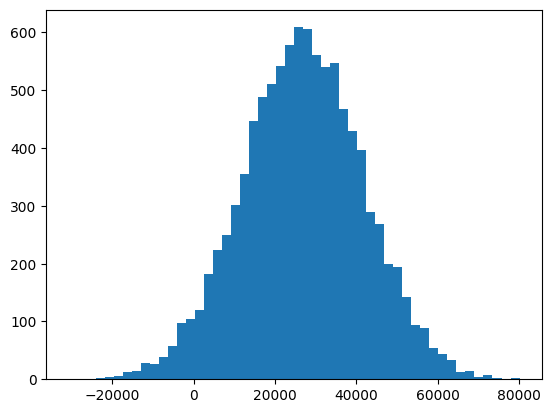

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.hist(incomes,50)
plt.show()

Now compute the median - since we have a nice, even distribution it too should be close to 27,000:

In [ ]:
np.median(incomes)

26882.677637537294

Now we'll add Jeff Bezos into the mix. Darn income inequality!

In [ ]:
incomes = np.append(incomes, [1000000000])

The median won't change much, but the mean does:

In [ ]:
np.median(incomes)

26812.830067605155

In [ ]:
np.mean(incomes)

126898.67275598667

## Mode

In [ ]:
## If I want to roll a dice twice to get numbers between 1 - 6
x = np.random.randint(1,7,size = 2)
print (x)

[5 2]


Next, let's generate some fake age data for 500 people:

In [ ]:
ages = np.random.randint(18, 90, size=500)
#ages


In [ ]:
from scipy import stats
x= stats.mode(ages)
x


<ipython-input-6-a8d32de0c431>:2: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  x= stats.mode(ages)


ModeResult(mode=array([58]), count=array([15]))

# Standard Deviation and Variance

In [ ]:
incomes.std()

14858.214745641653

In [ ]:
incomes.var()

220766545.42760307

# Covariance and Correlation
Covariance measures how two variables vary in tandem from their means.

For example, let's say we work for an e-commerce company, and they are interested in finding a correlation between page speed (how fast each web page renders for a customer) and how much a customer spends.

First, let's just make page speed and purchase amount totally random and independent of each other; a very small covariance will result as there is no real correlation:

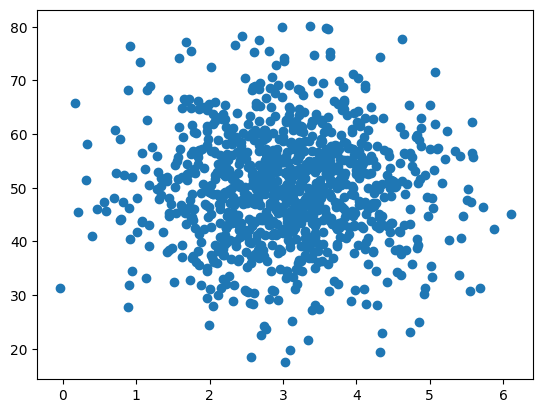

In [ ]:
from pylab import *
pageSpeeds = np.random.normal(3.0, 1.0, 1000)
purchaseAmount = np.random.normal(50.0, 10.0, 1000)

scatter(pageSpeeds, purchaseAmount)

In [ ]:
np.corrcoef(pageSpeeds, purchaseAmount)

array([[ 1.        , -0.00406404],
       [-0.00406404,  1.        ]])

Now let us force a perfect correlation by fabricating a totally linear relationship


array([[ 1., -1.],
       [-1.,  1.]])

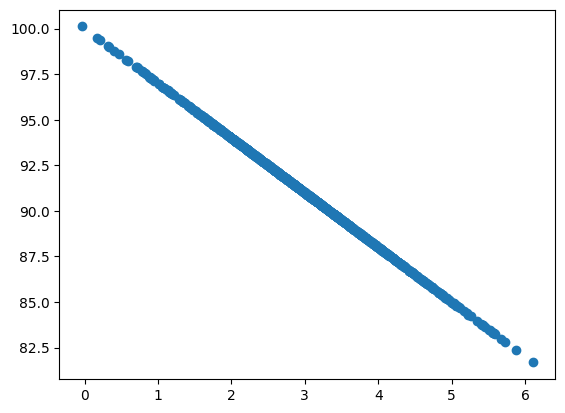

In [ ]:
purchaseAmount = 100 - pageSpeeds * 3

scatter(pageSpeeds, purchaseAmount)
np.corrcoef(pageSpeeds, purchaseAmount)

In [ ]:
cov(pageSpeeds, purchaseAmount)

array([[ 1.01989455, -3.05968366],
       [-3.05968366,  9.17905097]])

# Exercise: Basic Statistics: Customer Spend

Here's some code that will generate some random e-commerce data; just an array of total amount spent per transaction. Select the code block, and hit "play" to execute it:

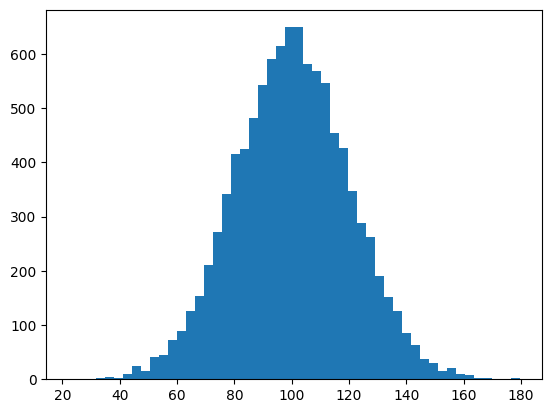

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

incomes = np.random.normal(100.0, 20.0, 10000)

plt.hist(incomes, 50)
plt.show()


a) find the mean and median of this data. In the code block below, write your code, and see if your result makes sense:

b) add the value 2500 to the dataset and recompute the mean and the median. Comment on your results



c) compute the standard deviation and variance

c) compute the covariance and correlation

# Introducing Pandas
Pandas is a Python library that makes handling tabular data easier. Since we're doing data science - this is something we'll use from time to time!

In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd

df = pd.read_csv("PastHires.csv")
df.head()

,Years Experience,Employed?,Previous employers,Level of Education,Top-tier school,Interned,Hired
0,10,Y,4,BS,N,N,Y
1,0,N,0,BS,Y,Y,Y
2,7,N,6,BS,N,N,N
3,2,Y,1,MS,Y,N,Y
4,20,N,2,PhD,Y,N,N


head() is a handy way to visualize what you've loaded. You can pass it an integer to see some specific number of rows at the beginning of your DataFrame:

In [ ]:
df.head(10)

,Years Experience,Employed?,Previous employers,Level of Education,Top-tier school,Interned,Hired
0,10,Y,4,BS,N,N,Y
1,0,N,0,BS,Y,Y,Y
2,7,N,6,BS,N,N,N
3,2,Y,1,MS,Y,N,Y
4,20,N,2,PhD,Y,N,N
5,0,N,0,PhD,Y,Y,Y
6,5,Y,2,MS,N,Y,Y
7,3,N,1,BS,N,Y,Y
8,15,Y,5,BS,N,N,Y
9,0,N,0,BS,N,N,N


You can also view the end of your data with tail():

In [ ]:
df.tail(4)

,Years Experience,Employed?,Previous employers,Level of Education,Top-tier school,Interned,Hired
9,0,N,0,BS,N,N,N
10,1,N,1,PhD,Y,N,N
11,4,Y,1,BS,N,Y,Y
12,0,N,0,PhD,Y,N,Y


We often talk about the "shape" of your DataFrame. This is just its dimensions. This particular CSV file has 13 rows with 7 columns per row:

In [ ]:
df.shape

(13, 7)

If your DataFrame has named columns (in our case, extracted automatically from the first row of a .csv file,) you can get an array of them back:

In [ ]:
df.columns

Index(['Years Experience', 'Employed?', 'Previous employers',
       'Level of Education', 'Top-tier school', 'Interned', 'Hired'],
      dtype='object')

Extracting a single column from your DataFrame looks like this - this gives you back a "Series" in Pandas:

In [ ]:
df['Hired']


0     Y
1     Y
2     N
3     Y
4     N
5     Y
6     Y
7     Y
8     Y
9     N
10    N
11    Y
12    Y
Name: Hired, dtype: object

To extract more than one column, you pass in an array of column names instead of a single one:

In [ ]:
df[['Years Experience', 'Hired']]


,Years Experience,Hired
0,10,Y
1,0,Y
2,7,N
3,2,Y
4,20,N
5,0,Y
6,5,Y
7,3,Y
8,15,Y
9,0,N


Sorting your DataFrame by a specific column looks like this:

In [ ]:
df.sort_values(['Years Experience'])

,Years Experience,Employed?,Previous employers,Level of Education,Top-tier school,Interned,Hired
1,0,N,0,BS,Y,Y,Y
5,0,N,0,PhD,Y,Y,Y
9,0,N,0,BS,N,N,N
12,0,N,0,PhD,Y,N,Y
10,1,N,1,PhD,Y,N,N
3,2,Y,1,MS,Y,N,Y
7,3,N,1,BS,N,Y,Y
11,4,Y,1,BS,N,Y,Y
6,5,Y,2,MS,N,Y,Y
2,7,N,6,BS,N,N,N


You can break down the number of unique values in a given column into a Series using value_counts() - this is a good way to understand the distribution of your data:

In [ ]:
degree_counts = df['Level of Education'].value_counts()
degree_counts

BS     7
PhD    4
MS     2
Name: Level of Education, dtype: int64

Pandas dataframe.replace() function is used to replace a string, regex, list, dictionary, series, number etc. from a dataframe. This is a very rich function as it has many variations.

In [ ]:

df['Hired'].replace({'Y': 1,'N':0})

0     1
1     1
2     0
3     1
4     0
5     1
6     1
7     1
8     1
9     0
10    0
11    1
12    1
Name: Hired, dtype: int64

# Exercise
Try extracting rows 5-10 of our DataFrame, preserving only the "Previous Employers" and "Hired" columns. Assign that to a new DataFrame, and create a histogram plotting the distribution of the previous employers in this subset of the data.

<Axes: >

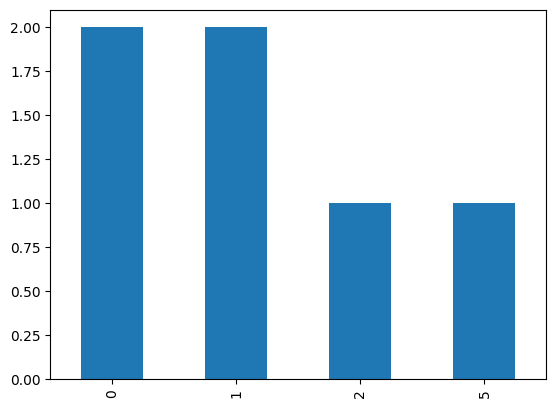

In [ ]:
# @title
previous_hired = df[["Previous employers", "Hired"]][5:11]
previous_hired
previous_hired ['Previous employers'].value_counts().plot(kind = "bar")


# Checking for missing data

In [ ]:
df.isnull().sum()

Years Experience      0
Employed?             0
Previous employers    0
Level of Education    0
Top-tier school       0
Interned              0
Hired                 0
dtype: int64